<a href="https://colab.research.google.com/github/SergioAcuva/SAMFACADES/blob/main/SAMFACADESipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Jul  2 01:16:17 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   70C    P0             28W /   70W |    7996MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Lo primero que hacemos es import os. Piensa en os como una caja de herramientas que Python nos da para interactuar con el sistema operativo de la máquina donde se está ejecutando nuestro código (en este caso, los servidores de Google Colab). Nos permite hacer cosas como navegar por carpetas, crear archivos, etc.

Luego, la línea HOME = os.getcwd() hace algo muy útil: descubre en qué carpeta estamos trabajando actualmente. getcwd() significa "get current working directory" (obtener directorio de trabajo actual). La ruta de esa carpeta se guarda en una variable que hemos llamado HOME.

Finalmente, print("HOME:", HOME) simplemente muestra esa ruta en la consola. Esto es muy útil para saber dónde Colab está ejecutando tu código y dónde buscará o guardará archivos por defecto. Te ayuda a orientarte dentro de la estructura de archivos del entorno de Colab.

Por ejemplo, si el resultado es /content, significa que estás en la carpeta principal del entorno de tu sesión de Colab.

In [ ]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content/segment-anything-2


In [ ]:
import os

# Definimos la ruta específica de la carpeta que queremos limpiar
folder_to_clean = '/content/data'

# --- ¡MUY IMPORTANTE! ---
# Antes de borrar, es una buena práctica verificar que la carpeta existe
# y, opcionalmente, mostrar su contenido para asegurarte de que es la correcta.

print(f"Verificando el contenido actual de: {folder_to_clean}")
if os.path.exists(folder_to_clean):
    # Lista el contenido de la carpeta. -F añade indicadores (barra para directorios)
    !ls -F "{folder_to_clean}"
else:
    print(f"La carpeta '{folder_to_clean}' no existe. No hay nada que borrar.")
    # Podemos salir si la carpeta no existe
    # exit() # Descomenta si quieres que el script se detenga aquí

print("\n--- Procediendo a borrar el contenido de la carpeta ---")

# ¡CUIDADO EXTREMO CON ESTA LÍNEA!
# Borra RECURSIVAMENTE y FORZADAMENTE todos los archivos y subcarpetas
# dentro de /content/data, pero mantiene la carpeta 'data' intacta.
if os.path.exists(folder_to_clean):
    !rm -rf "{folder_to_clean}/*"
    print(f"¡Contenido de '{folder_to_clean}' borrado exitosamente!")
else:
    # Este 'else' se ejecutará si la carpeta no existía desde el principio
    # o si fue borrada por algún comando anterior antes de llegar aquí.
    print(f"La carpeta '{folder_to_clean}' no existía o ya ha sido eliminada.")


print(f"\nVerificando el contenido después de borrar en: {folder_to_clean}")
if os.path.exists(folder_to_clean):
    !ls -F "{folder_to_clean}"
else:
    print(f"La carpeta '{folder_to_clean}' ya no existe (probablemente se borró ella misma o estaba vacía).")

# --- Opcional: Si quieres borrar la carpeta 'data' COMPLETA (incluyendo ella misma) ---
# Si necesitas borrar la carpeta 'data' por completo (no solo su contenido),
# usarías el siguiente comando. ¡Úsalo solo si estás seguro!
#
# print("\n--- Borrando la carpeta completa /content/data ---")
# if os.path.exists(folder_to_clean):
#     !rm -rf "{folder_to_clean}"
#     print(f"¡La carpeta '{folder_to_clean}' ha sido borrada completamente!")
# else:
#     print(f"La carpeta '{folder_to_clean}' no existe para ser borrada.")
#
# print(f"\nVerificando la existencia de la carpeta '{folder_to_clean}' después de intentar borrarla:")
# if not os.path.exists(folder_to_clean):
#     print(f"¡La carpeta '{folder_to_clean}' no existe. Se borró con éxito!")
# else:
#     print(f"La carpeta '{folder_to_clean}' aún existe (hubo un problema o no se ejecutó el borrado).")

Verificando el contenido actual de: /content/data

--- Procediendo a borrar el contenido de la carpeta ---
¡Contenido de '/content/data' borrado exitosamente!

Verificando el contenido después de borrar en: /content/data


#Instalar SAM 2 y dependencias

In [ ]:
!git clone https://github.com/facebookresearch/segment-anything-2.git
%cd {HOME}/segment-anything-2
!pip install -e . -q

Cloning into 'segment-anything-2'...
remote: Enumerating objects: 1070, done.
remote: Total 1070 (delta 0), reused 0 (delta 0), pack-reused 1070 (from 1)
Receiving objects: 100% (1070/1070), 128.11 MiB | 29.47 MiB/s, done.
Resolving deltas: 100% (381/381), done.
/content/segment-anything-2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55

In [ ]:
!pip install -q supervision jupyter_bbox_widget

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 837.4/837.4 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.6 MB/s eta 0:00:00


In [ ]:
!mkdir -p {HOME}/checkpoints
!wget -q https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2_hiera_tiny.pt -P {HOME}/checkpoints
!wget -q https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2_hiera_small.pt -P {HOME}/checkpoints
!wget -q https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2_hiera_base_plus.pt -P {HOME}/checkpoints
!wget -q https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2_hiera_large.pt -P {HOME}/checkpoints

#Descarga del DATASET de fachadas

In [ ]:
#Descarga de archivo
get_ipython().run_cell_magic('bash', '', '\nmkdir -p /content/data\n\nfor i in $(seq 1 100); do\n    URL="https://github.com/SergioAcuva/SAMFACADES/raw/main/DATASET/${i}.jpg"\n    wget -q $URL -P /content/data\ndone\n')

In [ ]:
import cv2
import torch
import base64

import numpy as np
import supervision as sv

from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor
from sam2.automatic_mask_generator import SAM2AutomaticMaskGenerator

In [ ]:
torch.autocast(device_type="cuda", dtype=torch.bfloat16).__enter__()

if torch.cuda.get_device_properties(0).major >= 8:
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32 = True

In [ ]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
CHECKPOINT = f"{HOME}/checkpoints/sam2_hiera_large.pt"
CONFIG = "sam2_hiera_l.yaml"

sam2_model = build_sam2(CONFIG, CHECKPOINT, device=DEVICE, apply_postprocessing=False)

In [ ]:
mask_generator = SAM2AutomaticMaskGenerator(sam2_model)

In [ ]:
IMAGE_PATH = "/content/SAMFACADES_IMAGES/1.jpg"

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
sam2_result = mask_generator.generate(image_rgb)

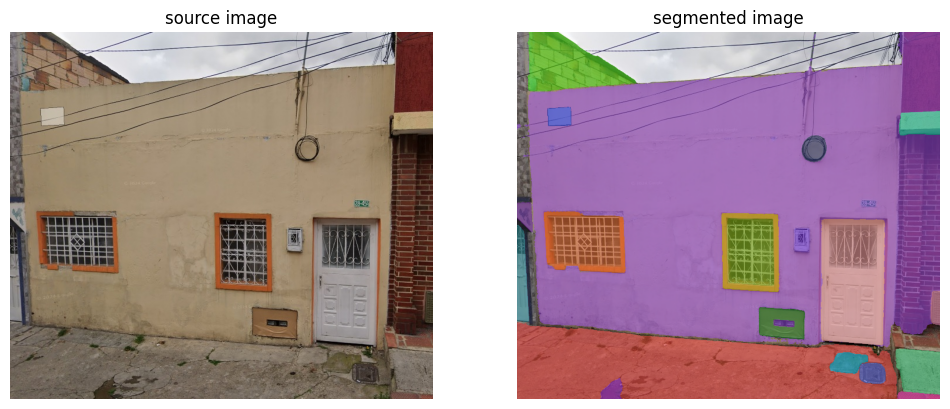

In [ ]:
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)
detections = sv.Detections.from_sam(sam_result=sam2_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

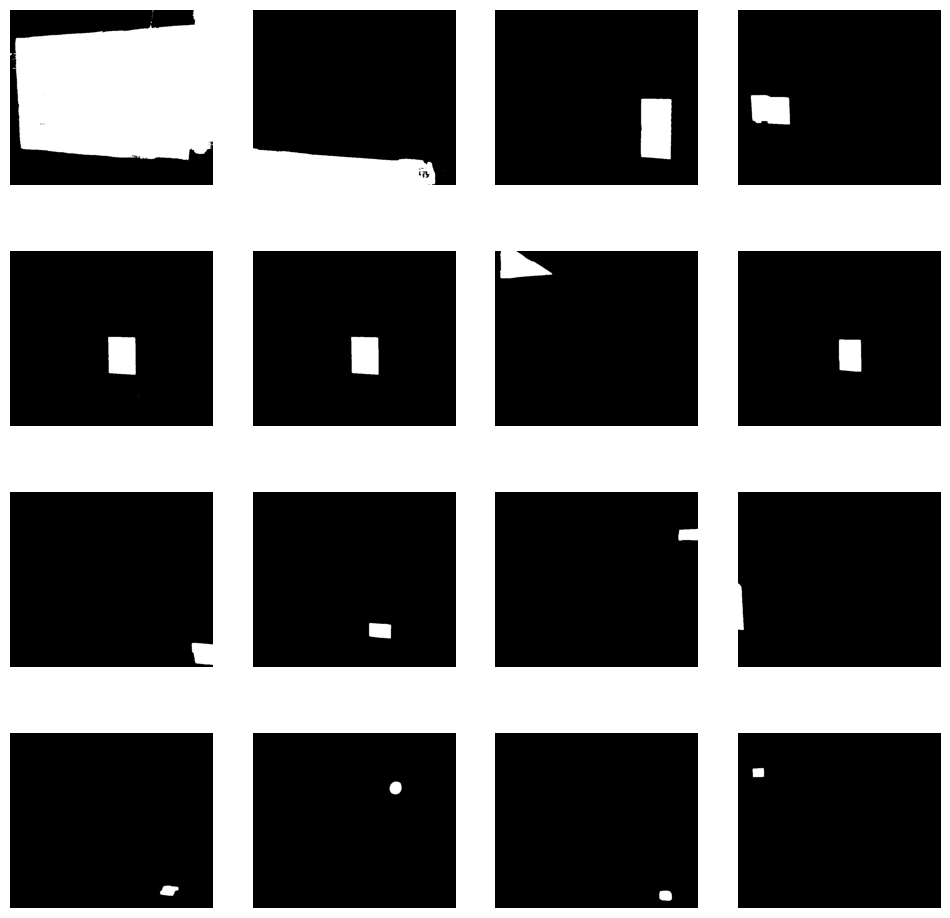

In [ ]:
masks = [
    mask['segmentation']
    for mask
    in sorted(sam2_result, key=lambda x: x['area'], reverse=True)
]

sv.plot_images_grid(
    images=masks[:16],
    grid_size=(4, 4),
    size=(12, 12)
)

In [ ]:
mask_generator_2 = SAM2AutomaticMaskGenerator(
    model=sam2_model,
    points_per_side=64,
    points_per_batch=128,
    pred_iou_thresh=0.7,
    stability_score_thresh=0.92,
    stability_score_offset=0.7,
    crop_n_layers=1,
    box_nms_thresh=0.7,
)

In [ ]:
sam2_result_2 = mask_generator_2.generate(image_rgb)

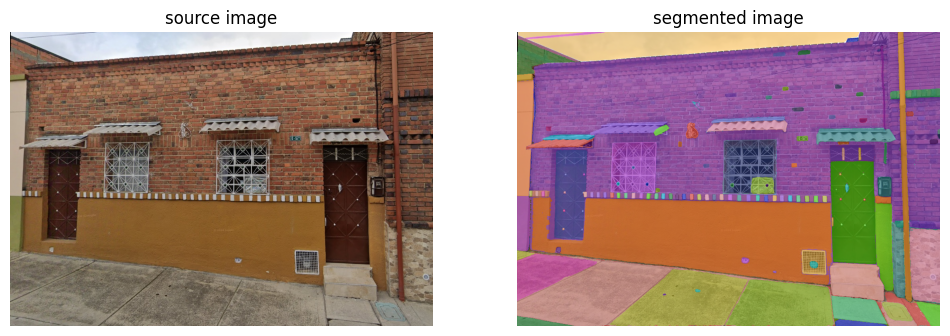

In [ ]:
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)
detections = sv.Detections.from_sam(sam_result=sam2_result_2)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

In [ ]:
predictor = SAM2ImagePredictor(sam2_model)

In [ ]:
IMAGE_PATH = f"{HOME}/data/1.jpg"

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

In [ ]:
def encode_image(filepath):
    with open(filepath, 'rb') as f:
        image_bytes = f.read()
    encoded = str(base64.b64encode(image_bytes), 'utf-8')
    return "data:image/jpg;base64,"+encoded

In [ ]:
IS_COLAB = True

if IS_COLAB:
    from google.colab import output
    output.enable_custom_widget_manager()

from jupyter_bbox_widget import BBoxWidget

widget = BBoxWidget()
widget.image = encode_image(IMAGE_PATH)
widget

BBoxWidget(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#b…

In [ ]:
widget.bboxes

[{'x': 41, 'y': 282, 'width': 157, 'height': 152, 'label': ''},
 {'x': 511, 'y': 270, 'width': 131, 'height': 289, 'label': ''},
 {'x': 414, 'y': 470, 'width': 80, 'height': 64, 'label': ''}]

In [ ]:
default_box = [
    {'x': 166, 'y': 835, 'width': 99, 'height': 175, 'label': ''},
    {'x': 472, 'y': 885, 'width': 168, 'height': 249, 'label': ''},
    {'x': 359, 'y': 727, 'width': 27, 'height': 155, 'label': ''},
    {'x': 164, 'y': 1044, 'width': 279, 'height': 163, 'label': ''}
]

boxes = widget.bboxes if widget.bboxes else default_box
boxes = np.array([
    [
        box['x'],
        box['y'],
        box['x'] + box['width'],
        box['y'] + box['height']
    ] for box in boxes
])

In [ ]:
predictor.set_image(image_rgb)

masks, scores, logits = predictor.predict(
    box=boxes,
    multimask_output=False
)

# With one box as input, predictor returns masks of shape (1, H, W);
# with N boxes, it returns (N, 1, H, W).
if boxes.shape[0] != 1:
    masks = np.squeeze(masks)

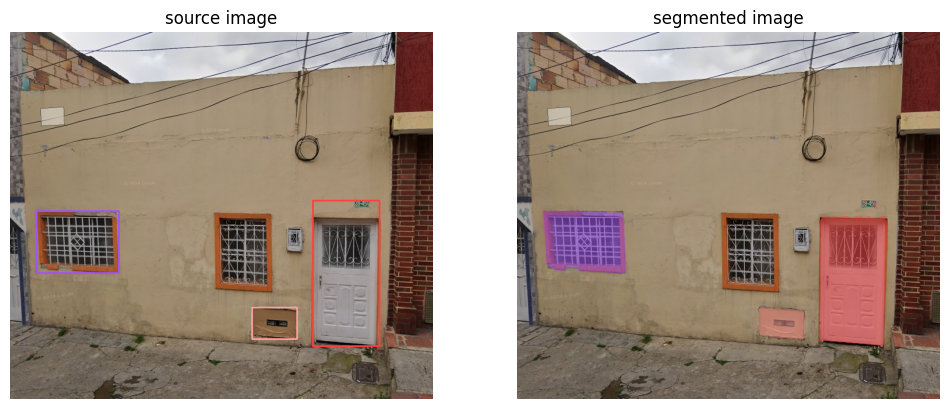

In [ ]:
box_annotator = sv.BoxAnnotator(color_lookup=sv.ColorLookup.INDEX)
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

detections = sv.Detections(
    xyxy=sv.mask_to_xyxy(masks=masks),
    mask=masks.astype(bool)
)

source_image = box_annotator.annotate(scene=image_bgr.copy(), detections=detections)
segmented_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[source_image, segmented_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

In [ ]:
IS_COLAB = True

if IS_COLAB:
    from google.colab import output
    output.enable_custom_widget_manager()

from jupyter_bbox_widget import BBoxWidget

widget = BBoxWidget()
widget.image = encode_image(IMAGE_PATH)
widget

BBoxWidget(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#b…

In [ ]:
widget.bboxes

[{'x': 170, 'y': 219, 'width': 0, 'height': 1, 'label': ''},
 {'x': 130, 'y': 357, 'width': 0, 'height': 2, 'label': ''},
 {'x': 388, 'y': 381, 'width': 0, 'height': 0, 'label': ''},
 {'x': 566, 'y': 445, 'width': 0, 'height': 1, 'label': ''}]

In [ ]:
default_box = [
    {'x': 330, 'y': 450, 'width': 0, 'height': 0, 'label': ''},
    {'x': 191, 'y': 665, 'width': 0, 'height': 0, 'label': ''},
    {'x': 86, 'y': 879, 'width': 0, 'height': 0, 'label': ''},
    {'x': 425, 'y': 727, 'width': 0, 'height': 0, 'label': ''}
]

boxes = widget.bboxes if widget.bboxes else default_box
input_point = np.array([
    [
        box['x'],
        box['y']
    ] for box in boxes
])
input_label = np.ones(input_point.shape[0])

In [ ]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

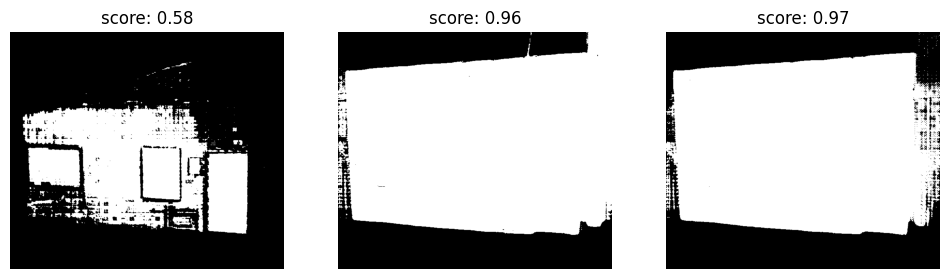

In [ ]:
sv.plot_images_grid(
    images=masks,
    titles=[f"score: {score:.2f}" for score in scores],
    grid_size=(1, 3),
    size=(12, 12)
)

#Automatizar las 100 prediciones

In [ ]:
import cv2
import os
from glob import glob
# Asegúrate de que SAM2AutomaticMaskGenerator y sv (Supervisely) estén importados
# Si no lo están, necesitarás importarlos al inicio de tu script.
# from sam_module import SAM2AutomaticMaskGenerator # Esto es un placeholder, ajusta según donde esté tu clase
# import supervisely as sv # O la forma en que hayas importado supervisely

# Asumiendo que 'sam2_model' ya ha sido cargado o inicializado
# mask_generator = SAM2AutomaticMaskGenerator(sam2_model)

# Definir las rutas de entrada y salida
INPUT_DIR = "/content/data"  # Ajusta esta ruta si tus imágenes están en otro lugar
OUTPUT_DIR = "/content/output"

# Crear la carpeta de salida si no existe
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Obtener una lista de todas las imágenes .jpg en la carpeta de entrada
image_paths = glob(os.path.join(INPUT_DIR, "*.jpg"))

print(f"Se encontraron {len(image_paths)} imágenes .jpg en '{INPUT_DIR}'")

# Loop a través de cada imagen
for image_path in image_paths:
    print(f"Procesando: {image_path}")

    # Cargar la imagen
    image_bgr = cv2.imread(image_path)
    if image_bgr is None:
        print(f"Advertencia: No se pudo cargar la imagen {image_path}. Saltando.")
        continue

    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    # Generar máscaras con SAM2
    sam2_result = mask_generator.generate(image_rgb)

    # Anotar la imagen
    # Asegúrate de que sv.MaskAnnotator y sv.ColorLookup.INDEX estén definidos
    mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)
    detections = sv.Detections.from_sam(sam_result=sam2_result)
    annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

    # Construir la ruta de salida para la imagen segmentada
    # Extrae el nombre del archivo de la ruta original
    file_name = os.path.basename(image_path)
    output_image_path = os.path.join(OUTPUT_DIR, f"segmented_{file_name}")

    # Guardar la imagen segmentada
    cv2.imwrite(output_image_path, annotated_image)
    print(f"Guardado: {output_image_path}")

print("Procesamiento completado para todas las imágenes.")

Se encontraron 100 imágenes .jpg en '/content/data'
Procesando: /content/data/46.jpg
Guardado: /content/output/segmented_46.jpg
Procesando: /content/data/6.jpg
Guardado: /content/output/segmented_6.jpg
Procesando: /content/data/99.jpg
Guardado: /content/output/segmented_99.jpg
Procesando: /content/data/62.jpg
Guardado: /content/output/segmented_62.jpg
Procesando: /content/data/76.jpg
Guardado: /content/output/segmented_76.jpg
Procesando: /content/data/42.jpg
Guardado: /content/output/segmented_42.jpg
Procesando: /content/data/19.jpg
Guardado: /content/output/segmented_19.jpg
Procesando: /content/data/23.jpg
Guardado: /content/output/segmented_23.jpg
Procesando: /content/data/26.jpg
Guardado: /content/output/segmented_26.jpg
Procesando: /content/data/78.jpg
Guardado: /content/output/segmented_78.jpg
Procesando: /content/data/39.jpg
Guardado: /content/output/segmented_39.jpg
Procesando: /content/data/79.jpg
Guardado: /content/output/segmented_79.jpg
Procesando: /content/data/17.jpg
Guard

KeyboardInterrupt: 